In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from collections import Counter
from src.utils import *
import src.utils as utils
import importlib
import random
import geopandas as gpd
from numpy import log1p
importlib.reload(utils)

<module 'src.utils' from '/Users/leila/Desktop/ADA_Project/ada-2024-project-ada212/src/utils.py'>

In [3]:
#Ensure reproduciblity of numpy computations and sklearn models
np.random.seed(42)
random.seed(42)

# First cleaning of the dataset

The dataset book_adaptations.csv is the resulting dataset from data_extraction.ipynb. It combines informations retrieved from multiple sources listed in the README.md

In [4]:

# Load the csv file 
dataset = pd.read_csv('data/book_adaptation.csv')
# Display the first few rows
dataset.head()


,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_wikidata_id,imdb_rating,imdb_total_votes,...,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_rating,book_publisher,book_ratings_count,book_pages,movie_is_adaptation
0,Ghosts of Mars,2001.0,777058.028297,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Q261700,4.9,58906.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",Q16250726,6.1,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Brun bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",Q4978832,5.6,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,White Of The Eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",Q7995657,6.1,3090.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,A Woman in Flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",Q869644,5.9,647.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


# First statistical description and drop the duplicates

In [5]:
dataset.describe()

,movie_release,movie_revenue,movie_runtime,imdb_rating,imdb_total_votes,movie_budget,book_release,book_part_of_series,literary_work,written_work,...,book_science_fiction,book_horror,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_rating,book_ratings_count,book_pages
count,75130.000000,9.897000e+03,6.153600e+04,63616.000000,6.361600e+04,1.769500e+04,4162.000000,5065.000000,5065.000000,5065.000000,...,5065.000000,5065.000000,5065.000000,5065.000000,5065.000000,5065.000000,5065.000000,3232.000000,3.233000e+03,3154.000000
mean,1977.492333,3.117755e+06,1.118020e+02,6.197689,1.223193e+04,6.584343e+05,1938.316675,0.115301,0.780257,0.201974,...,0.060809,0.036130,0.034551,0.049358,0.016387,0.025469,0.080750,3.886726,1.572239e+05,289.936906
std,29.090768,8.035250e+06,4.351383e+03,1.144999,7.131373e+04,1.252345e+06,55.015238,0.319416,0.414114,0.401513,...,0.239004,0.186633,0.182657,0.216636,0.126971,0.157560,0.272478,0.249838,4.167123e+05,197.031895
min,1010.000000,5.822935e-02,0.000000e+00,1.000000,5.000000e+00,4.342586e-02,1678.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000
25%,1956.000000,1.965851e+05,8.100000e+01,5.600000,1.220000e+02,5.317417e+04,1905.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.740000,2.222000e+03,164.000000
50%,1985.000000,8.258427e+05,9.300000e+01,6.300000,5.450000e+02,2.658709e+05,1952.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.910000,1.432100e+04,257.500000
75%,2004.000000,2.778871e+06,1.060000e+02,7.000000,2.585000e+03,7.101449e+05,1981.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.060000,1.050280e+05,368.000000
max,2016.000000,2.831111e+08,1.079281e+06,10.000000,2.962241e+06,5.246682e+07,2013.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.620000,6.726008e+06,1720.000000


- movie_runtime: The average runtime is approximately 112 minutes, with a wide range from 0 (indicating missing or incorrect data) to over 1 million minutes, which seems like an outlier or data entry error.

- Release Years: The movie_release feature ranges from 1010 to 2016, indicating that some data might be historically significant or include errors (e.g., movies listed from centuries ago). The mean release year of 1977 suggests a strong representation of 20th-century films.

- movie_revenue and movie_budget: These features show high variability, with standard deviations around $8 million and $1.25 million, and maximum values reaching $283 million and $52 million, respectively. This indicates the presence of high-grossing blockbusters that could skew analysis. Mean values of $3.1 million for revenue and $658,000 for budget suggest a mix of high and low-budget films in the dataset.

In [6]:
dataset[dataset['movie_release']==1010]

,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_wikidata_id,imdb_rating,imdb_total_votes,...,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_rating,book_publisher,book_ratings_count,book_pages,movie_is_adaptation
63086,Hunting Season,1010.0,NaN,140.0,"{""/m/02hwyss"": ""Turkish Language"", ""/m/02h40lc...","{""/m/01znc_"": ""Turkey""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...",Q367228,7.4,37441.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


From researches, we saw that the actual release date of this movie is in 2010 suggesting error in the dataset, we'll correct this error and be aware of potential other errors.

In [7]:
dataset.loc[dataset['movie_release'] == 1010, 'movie_release'] = 2010

In [8]:
# Initial check for duplicates in the dataset
duplicates_initial = sum(dataset.duplicated())
print('Initially the number of duplicates was: ', duplicates_initial)

# Removing the duplicated rows and checking their deletion
dataset = dataset.drop_duplicates()
duplicates_final = sum(dataset.duplicated())
print('Afterwards the number of duplicates becomes: ', duplicates_final)

# Check for duplicates based on 'movie_wikidata_id'
duplicates_initial_wikidata = sum(dataset.duplicated(subset='movie_wikidata_id'))
print('Number of duplicates based on "movie_wikidata_id" before dropping:', duplicates_initial_wikidata)

# Drop duplicated rows based on 'movie_wikidata_id', keeping the first occurrence
dataset = dataset.drop_duplicates(subset='movie_wikidata_id', keep='first')

duplicates_final_wikidata = sum(dataset.duplicated(subset='movie_wikidata_id'))
print('Number of duplicates based on "movie_wikidata_id" after dropping:', duplicates_final_wikidata)

Initially the number of duplicates was:  77
Afterwards the number of duplicates becomes:  0
Number of duplicates based on "movie_wikidata_id" before dropping: 5430
Number of duplicates based on "movie_wikidata_id" after dropping: 0


# Format of the data

First we're going to correct the "movie_language", "movie_countries" and "movie_genres". Indeed, these columns contain dictionary-like structures that need to be parsed and converted into more straightforward formats

In [9]:
# Apply the function to the columns
dataset['movie_languages'] = dataset['movie_languages'].apply(parse_dict_column)
dataset['movie_countries'] = dataset['movie_countries'].apply(parse_dict_column)
dataset['movie_genres'] = dataset['movie_genres'].apply(parse_dict_column)
# Check the results
dataset[['movie_languages', 'movie_countries', 'movie_genres']].head()


,movie_languages,movie_countries,movie_genres
0,English Language,United States of America,Thriller; Science Fiction; Horror; Adventure; ...
1,English Language,United States of America,Mystery; Biographical film; Drama; Crime Drama
2,Norwegian Language,Norway,Crime Fiction; Drama
3,English Language,United Kingdom,Thriller; Erotic thriller; Psychological thriller
4,German Language,Germany,Drama


Instead of having English Language , German Language... We would rather have the language alone, to have a simpler analysis later on.

In [10]:

# Apply the function to the 'movie_languages' column
dataset['movie_languages'] = dataset['movie_languages'].apply(clean_language_format)
dataset['movie_languages'].head()


0      English
1      English
2    Norwegian
3      English
4       German
Name: movie_languages, dtype: object

In [11]:
dataset['movie_genres'] = dataset['movie_genres'].apply(lambda x: x.split('; '))
dataset['movie_languages'] = dataset['movie_languages'].apply(lambda x: x.split('; '))
dataset['movie_countries'] = dataset['movie_countries'].apply(lambda x: x.split('; '))

# Handling missing values

One important factor to aknowledge for when analyzing data is the way we handle missing values. First, we need to see where they are mostly present

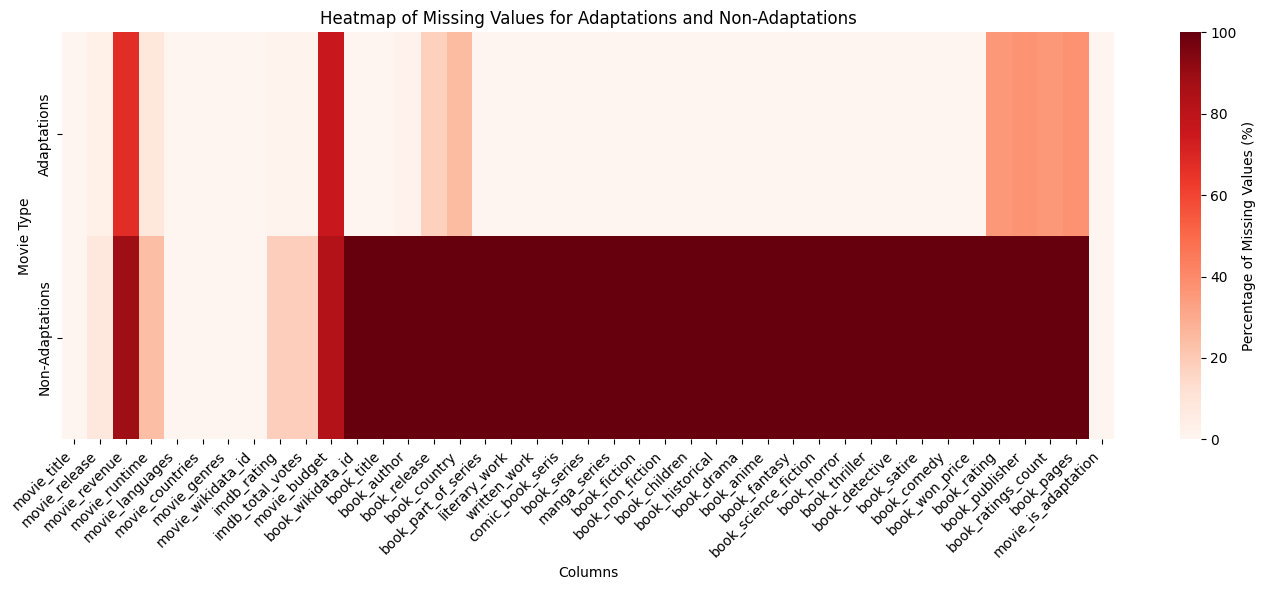

In [12]:
heatmap_missing_values(dataset)

For the non adaptation movies, it is normal not to have informations related to books.

- movie_revenue: This feature has a significant proportion of missing data, especially for non-adaptations, which might impact our analysis on financial performance and budget-revenue comparisons.

- movie_budget: also shows a considerable percentage of missing values for non-adaptations. This could be important for analyzing budget trends and their correlation with box office performance.

- movie_runtime: The percentage of missing values for this feature is moderate, suggesting that while there is data available, some gaps remain. This feature is relevant for exploring how runtime correlates with success metrics.

- imdb_rating and imdb_total_votes: These features are relatively complete for both adaptations and non-adaptations, making them reliable for analyzing the critical and audience reception of movies.

- book_rating and book_ratings_count: The heatmap shows that while there is data available for adaptations, there are still some gaps.

- book_pages: This feature is relevant when assessing whether the length of a book impacts its adaptation's success. The heatmap indicates some missing values for adaptations, which could limit the analysis

### Plot proportion of missing data for movie_revenue and movie_budget over time

In [13]:
# Calculate the percentage of missing revenue and budget data by year
missing_revenue_by_year_adapt = proportion_missing_values(dataset, 'movie_revenue', 'movie_release', True)
missing_revenue_by_year_non_adapt= proportion_missing_values(dataset, 'movie_revenue', 'movie_release', False)
missing_budget_by_year_adapt = proportion_missing_values(dataset, 'movie_budget', 'movie_release', True)
missing_budget_by_year_non_adapt = proportion_missing_values(dataset, 'movie_budget', 'movie_release', False)


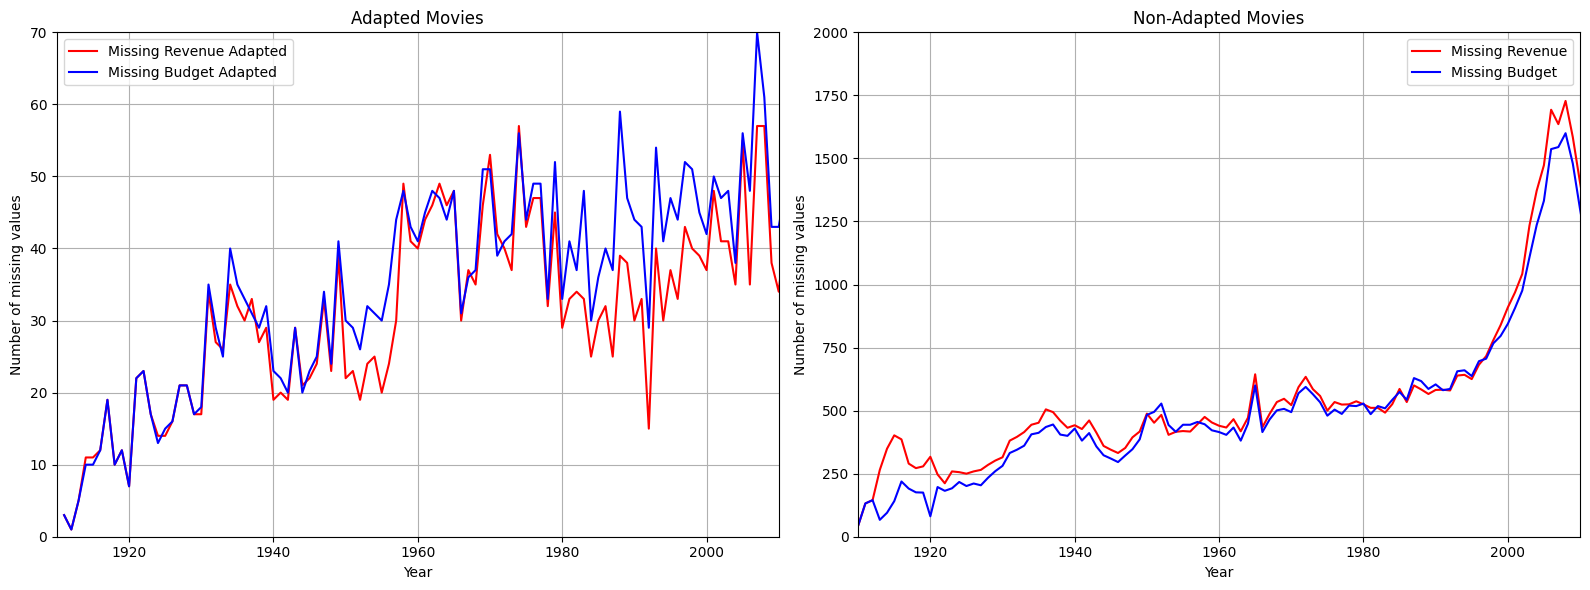

In [14]:
plot_missing_revenues_budget(missing_revenue_by_year_adapt,missing_budget_by_year_adapt,missing_revenue_by_year_non_adapt,missing_budget_by_year_non_adapt)

- Adapted Movies:

    The number of missing values for both movie_revenue and movie_budget has fluctuated but generally increased over time.
    
    Post-1960s, there is a more noticeable increase, indicating more adaptations with incomplete data, possibly due to a rise in movie production.

- Non-Adapted Movies:

    A more consistent trend is observed, with missing values for both features gradually increasing over time, especially from the 1980s onward.

    The late 20th century and early 21st century show a sharp rise in missing data, which may reflect the growth in movie production but incomplete financial records.

For both groups we observe a higher number of missing values in more recent movies.

In [15]:
missing_budget_count = dataset['movie_budget'].isna().sum()
print(f"Number of missing values in 'movie_budget': {missing_budget_count}")

missing_revenue_count = dataset['movie_revenue'].isna().sum()
print(f"Number of missing values in 'movie_revenue': {missing_revenue_count}")

Number of missing values in 'movie_budget': 62772
Number of missing values in 'movie_revenue': 66785


In order to tackle this high amount of missing values for movie_revenue and movie_budget. We decided to try and extract more values using a SPARQL query in the data_extraction.ipynb file. Let's see if it has improven our results:

In [16]:
dataset_expanded=pd.read_csv('data/book_adaptation_expanded.csv')

In [17]:
merged_df = dataset.merge(
    dataset_expanded,
    on='movie_wikidata_id',
    how='left'
)

In [18]:
# Fill NaN values in the original budget and revenue columns using the fetched data
merged_df['movie_budget'] = merged_df['movie_budget'].fillna(merged_df['budget'])
merged_df['movie_revenue'] = merged_df['movie_revenue'].fillna(merged_df['revenue'])

# Drop auxiliary columns after merging
merged_df.drop(['budget', 'revenue'], axis=1, inplace=True)

# Final check to ensure row count consistency
print(f"Original DataFrame length: {len(dataset)}")
print(f"DataFrame length after merging: {len(merged_df)}")

Original DataFrame length: 76551
DataFrame length after merging: 76551


In [19]:
#Checking for potential improvement 
missing_budget_count_new = merged_df['movie_budget'].isna().sum()
print(f"Number of missing values in 'movie_budget': {missing_budget_count_new}")

missing_revenue_count_new = merged_df['movie_revenue'].isna().sum()
print(f"Number of missing values in 'movie_revenue': {missing_revenue_count_new}")

Number of missing values in 'movie_budget': 61700
Number of missing values in 'movie_revenue': 65909


In [20]:
# Calculate the reduction in missing values for movie_budget and movie_revenue
budget_improvement = missing_budget_count - missing_budget_count_new
revenue_improvement = missing_revenue_count - missing_revenue_count_new

# Print out the improvements
print(f"Reduction in missing values for 'movie_budget': {budget_improvement}")
print(f"Reduction in missing values for 'movie_revenue': {revenue_improvement}")


Reduction in missing values for 'movie_budget': 1072
Reduction in missing values for 'movie_revenue': 876


We see that we managed to obtain some more data. The amount of Nan values is still significant , however the improvment stays notable 

In [21]:
#Setting the dataset as the merged dataset in which more values are present for movie_revenue and movie_budget
dataset=merged_df

So there are approximately 80% of NAs for revenue and budget. This very large number is inconvenient for our analysis since we want to explore how books traits could lead to successful adaptations. We decided to use an auxiliary dataset composed of 20-25% of our original dataset to get these informations. 

But first lets normalize the movie_budget and movie_revenue features to make them comparable. To do that we use inflation_adjustment.csv which was created in the data_extraction.ipynb based on the US Consumer Price.

In [22]:
inflation_adjustment = pd.read_csv('data/inflation_adjustment.csv')
inflation_adjustment = inflation_adjustment.rename(columns={'year': 'movie_release'})

In [23]:
merged_df = dataset.merge(inflation_adjustment[['movie_release', 'inflation_adjustment']], on='movie_release', how='left')

merged_df['movie_revenue'] = merged_df['movie_revenue'] * merged_df['inflation_adjustment']
merged_df['movie_budget'] = merged_df['movie_budget'] * merged_df['inflation_adjustment']

In [24]:
dataset['movie_revenue']=merged_df['movie_revenue']
dataset['movie_budget']=merged_df['movie_budget']

Now let's create our auxiliary dataset!

In [25]:
#auxiliary dataset composed of rows with at least one of revenue or budget non missing
auxiliary_dataset_revenue_budget = dataset.dropna(subset=['movie_revenue', 'movie_budget'], how='all')

#Ensure we have 20-25% of the original dataset as expected
print(proportion_of_dataset(dataset, auxiliary_dataset_revenue_budget))


25.686143877937585


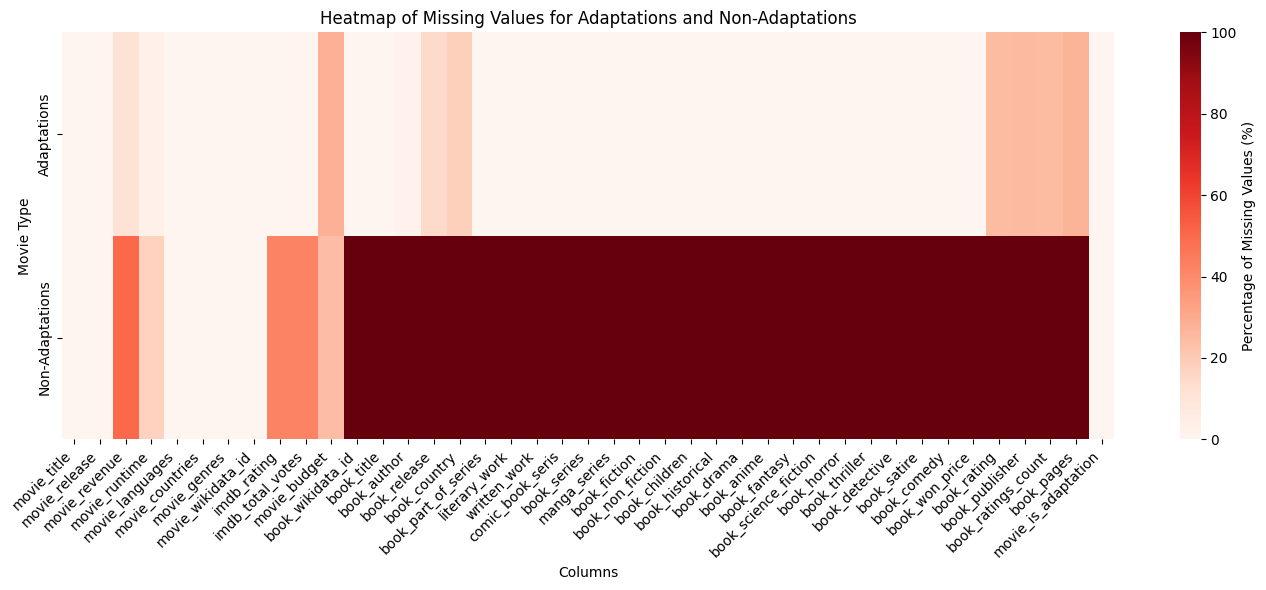

In [26]:
#Visualize distribution of NAs in the auxiliary dataset
heatmap_missing_values(auxiliary_dataset_revenue_budget)

### Handle NAs for book_pages and movie_runtime

In [27]:
#Keep count of NAs before imputation 

# Count the number of missing 'book_pages' only for adaptations
missing_book_pages_count = dataset[dataset['movie_is_adaptation'] == True]['book_pages'].isna().sum()

# Calculate the proportion of missing 'book_pages' for adaptations
total_adaptations = dataset[dataset['movie_is_adaptation'] == True].shape[0]
proportion_missing_book_pages = (missing_book_pages_count / total_adaptations) * 100

#Count the number of missing 'movie_runtime'
missing_runtime_count = dataset['movie_runtime'].isna().sum()


In [28]:
# Fill NaNs in 'book_pages' and 'movie_runtime' with their respective medians
dataset['book_pages']= dataset['book_pages'].fillna(dataset['book_pages'].median())
dataset['movie_runtime'] = dataset['movie_runtime'].fillna(dataset['movie_runtime'].median())

In [29]:
# Print the count of NaNs before filling
print("Before filling NaNs:")
print(f"Missing 'book_pages' count for adaptations: {missing_book_pages_count}")
print(f"Proportion of missing 'book_pages' for adaptations: {proportion_missing_book_pages:.2f}%")
print(f"Number of missing values in 'movie_runtime': {missing_runtime_count}")

# Print the count of NaNs after filling
print("\nAfter filling NaNs:")
print(f"Missing 'book_pages' count: {dataset['book_pages'].isna().sum()}")
print(f"Missing 'movie_runtime' count: {dataset['movie_runtime'].isna().sum()}")


Before filling NaNs:
Missing 'book_pages' count for adaptations: 1840
Proportion of missing 'book_pages' for adaptations: 37.52%
Number of missing values in 'movie_runtime': 17702

After filling NaNs:
Missing 'book_pages' count: 0
Missing 'movie_runtime' count: 0


#### Why do we think it is okay to use this method for imputation 
Filling NaNs for book_pages and movie_runtime with the median is appropriate because these features are continuous and have natural variability within a typical range. The median provides a central value that represents the majority of observations without being skewed by outliers. This ensures that the imputed values align with realistic counts for book pages and movie runtimes, maintaining the integrity of the data for further analysis.

### Assessing usability of book_ratings 

In [30]:
print_missing_values_summary(dataset, ['book_rating'], adaptation=True)

Count of adapted movies: 4904

Missing Values Summary:
book_rating: 1764 missing values (35.97%)

Proportion of missing values for adaptations:
book_rating: 35.97%

Proportion of missing values for the entire dataset (including non-adaptations):
book_rating: 2.30%


With 35.99% of book_rating data missing for adaptations, there is still a majority (about 64%) of data available. So we have enough data to perform meaningful analyses, but any conclusions drawn may be influenced by the missing values.

# Handling outliers
Based on the statistical description of the dataset performed earlier, we can see that outliers values are present only for the runtime features.

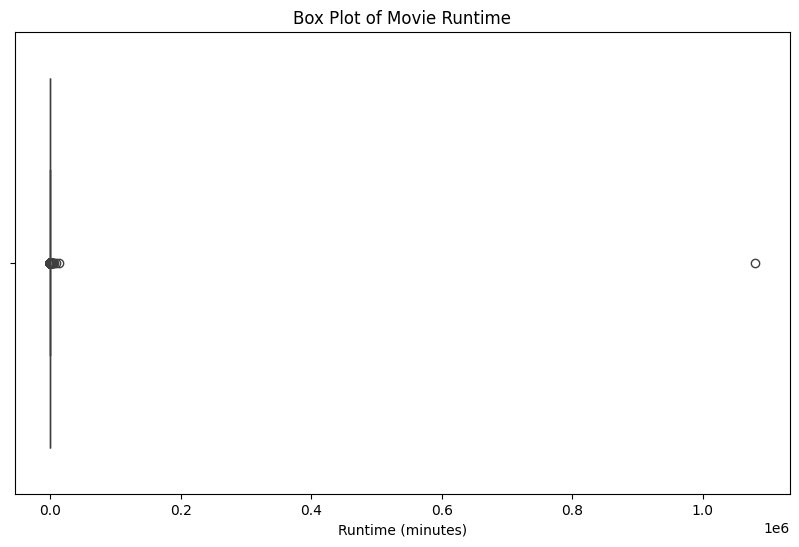

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['movie_runtime'])
plt.title('Box Plot of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.show()

In [32]:
# We searched for the longest movie existing and it appeared to be 240h long so 14400 min
threshold = 14400

# Identify high outliers
high_outliers = dataset[dataset['movie_runtime'] > threshold]
print("Number of high outliers using percentile:", high_outliers.shape[0])
print("High outliers:\n", high_outliers['movie_runtime'])

#Deletion of the outlier from the dataset
dataset=dataset.drop(high_outliers.index)

Number of high outliers using percentile: 1
High outliers:
 12031    1079281.0
Name: movie_runtime, dtype: float64


# Feature engineering 

We may consider creating some features that will later serve for our analysis

In [33]:
#Dataset
# Time gap between movie release and book relase
dataset['time_gap'] = dataset['movie_release'] - dataset['book_release']

#measure profitability of a movie
dataset['revenue_budget_ratio'] = dataset['movie_revenue'] / dataset['movie_budget']

# Auxiliary dataset
auxiliary_dataset_revenue_budget.loc[:, 'time_gap'] = auxiliary_dataset_revenue_budget['movie_release'] - auxiliary_dataset_revenue_budget['book_release']
auxiliary_dataset_revenue_budget.loc[:, 'revenue_budget_ratio'] = auxiliary_dataset_revenue_budget['movie_revenue'] / auxiliary_dataset_revenue_budget['movie_budget']


# Save cleaned dataset

In [34]:
dataset.to_csv('data/cleaned_dataset.csv')

# First Data Visualizations after pre-processing

In [35]:
df_visualization=dataset.copy()

## Proportion of adapted books in the dataset

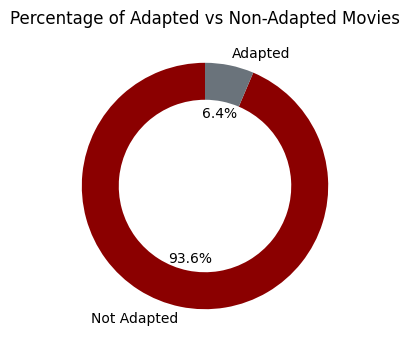

In [36]:
# Calculate the counts of adapted vs non-adapted movies
adapted_counts = df_visualization['movie_is_adaptation'].value_counts()
labels = ['Not Adapted', 'Adapted']

# Plot the donut chart
plt.figure(figsize=(4, 4))
plt.pie(adapted_counts, labels=labels, autopct='%1.1f%%', colors=['#8B0000', '#6a737b'], startangle=90, wedgeprops=dict(width=0.3))
plt.title('Percentage of Adapted vs Non-Adapted Movies')
plt.show()

Adapted movies represent quite a small proportion of our dataset. This low value may limit the scope of certain conclusions or analyses. One way to handle that would be to balance the data. 

## Distribution of numerical features

For the numerical values, it is important to see how is the distribution and if it is needed to apply some kind of transformation. We're here considering : movie_revenue, movie_budget, imdb_rating, book_rating, book_pages

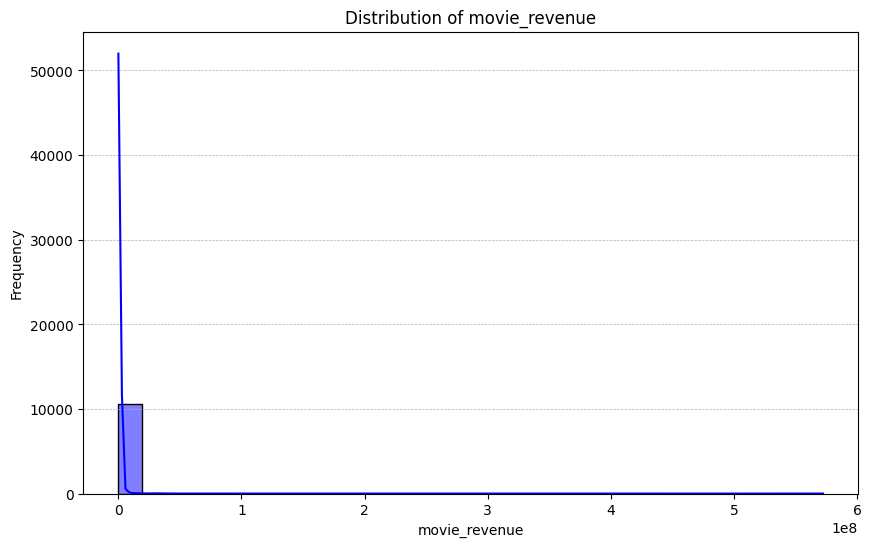

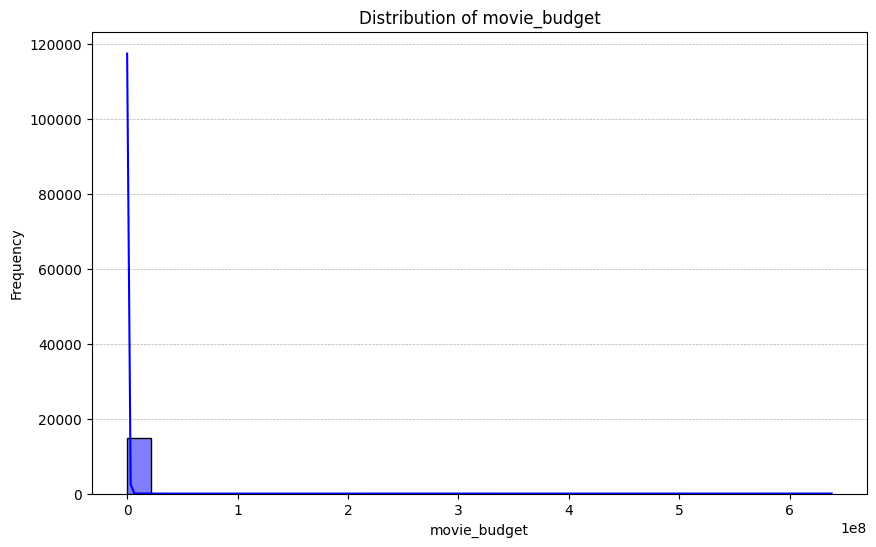

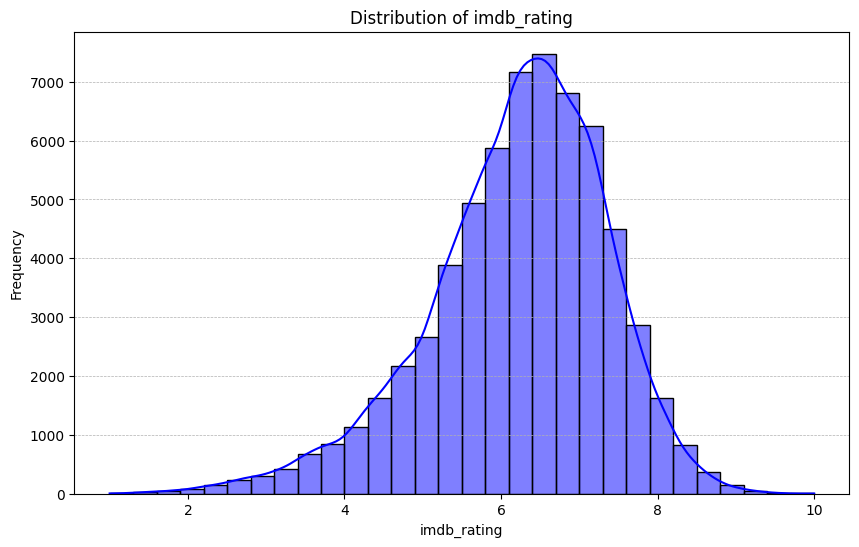

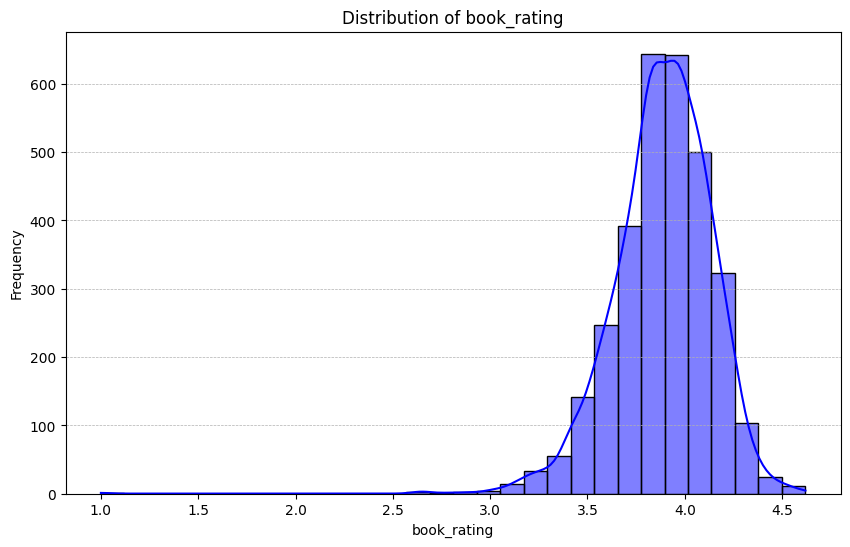

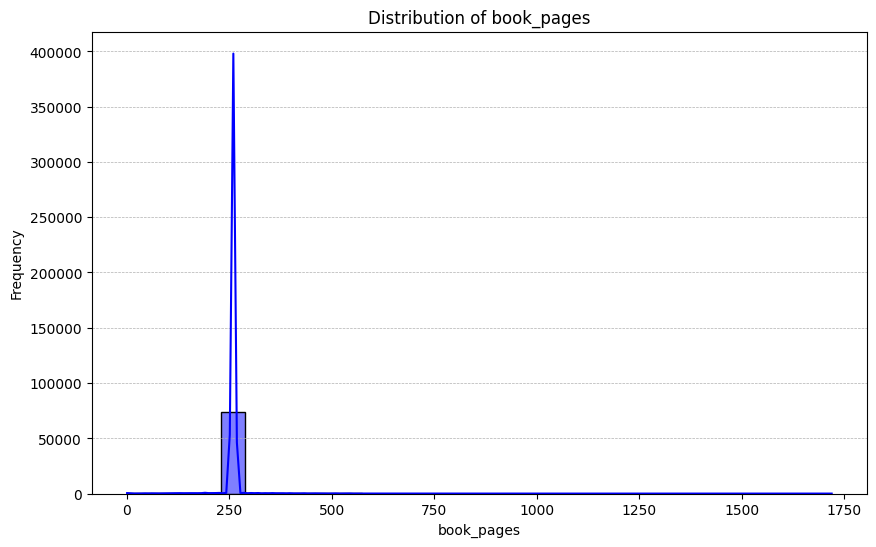

In [37]:
# List of columns to plot
columns_to_plot = ['movie_revenue', 'movie_budget', 'imdb_rating', 'book_rating', 'book_pages']

# Call the function with your dataset and column list
plot_histograms(df_visualization, columns_to_plot)

The movie revenues and movie budget show 2 heavy tails distributions. A solution one could think of would be to use the log of the values.

In [38]:
from scipy.stats import skew

skewness_revenue = dataset['movie_revenue'].skew()
skewness_budget=dataset['movie_budget'].skew()
print(f"Skewness of movie_revenue: {skewness_revenue}")
print(f"Skewness of movie_budget: {skewness_budget}")

Skewness of movie_revenue: 41.9513762070254
Skewness of movie_budget: 69.1197246333452


In [39]:
#Handling the skewness of the data
dataset['movie_revenue_log'] = np.log10(dataset['movie_revenue'].replace(0, np.nan)).fillna(0)  
dataset['movie_budget_log'] = np.log10(dataset['movie_budget'].replace(0, np.nan)).fillna(0)  


## Books features

In [40]:
df_visualization.columns

Index(['movie_title', 'movie_release', 'movie_revenue', 'movie_runtime',
       'movie_languages', 'movie_countries', 'movie_genres',
       'movie_wikidata_id', 'imdb_rating', 'imdb_total_votes', 'movie_budget',
       'book_wikidata_id', 'book_title', 'book_author', 'book_release',
       'book_country', 'book_part_of_series', 'literary_work', 'written_work',
       'comic_book_seris', 'book_series', 'manga_series', 'book_fiction',
       'book_non_fiction', 'book_children', 'book_historical', 'book_drama',
       'book_anime', 'book_fantasy', 'book_science_fiction', 'book_horror',
       'book_thriller', 'book_detective', 'book_satire', 'book_comedy',
       'book_won_price', 'book_rating', 'book_publisher', 'book_ratings_count',
       'book_pages', 'movie_is_adaptation', 'time_gap',
       'revenue_budget_ratio'],
      dtype='object')

### Top genres

On the one hand, we need to understand how are ditributed the different genres of books, which ones are preferred. and see how they may be distributed baswed on various criterias.
To begin with, we're going to analyze the top 10 genres distribution.

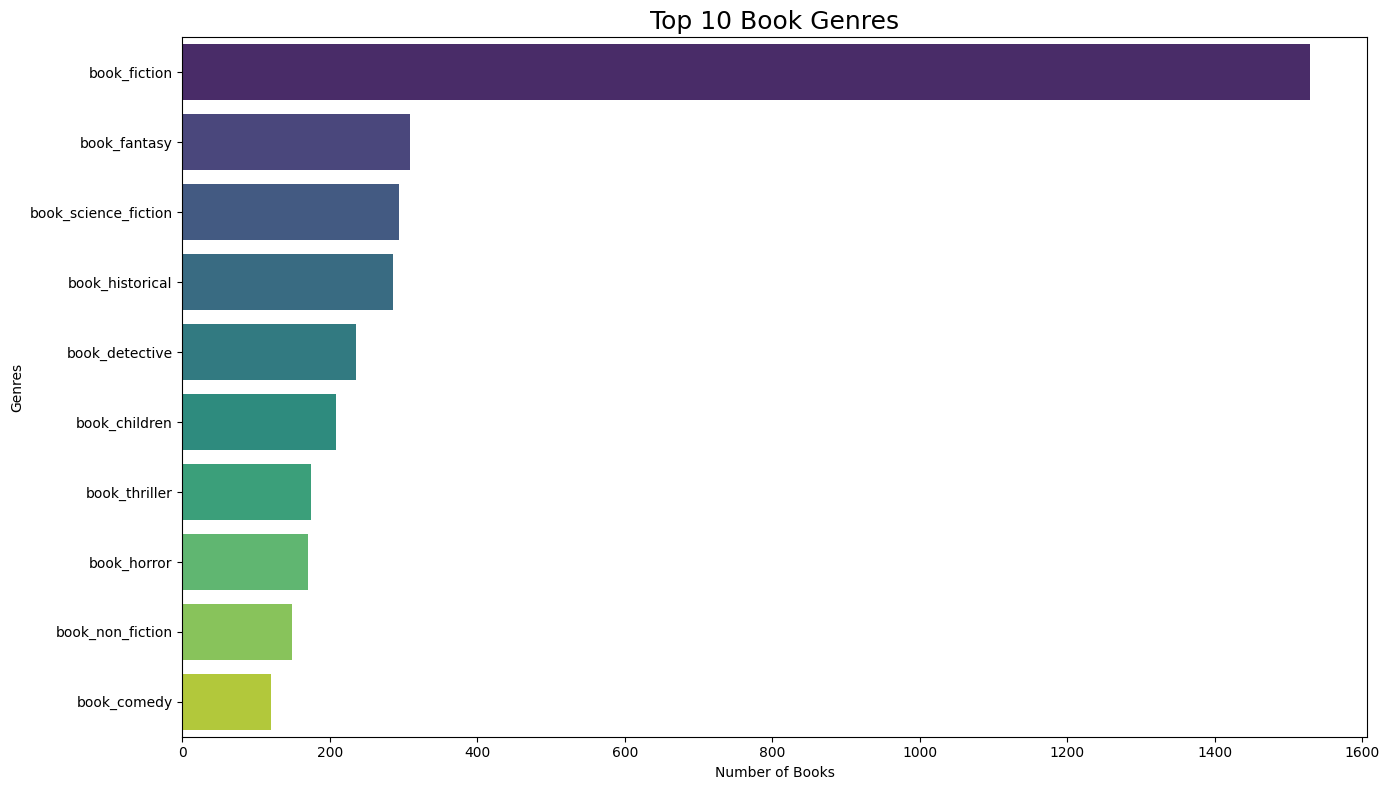

In [41]:
# Get list of individual book genres
book_genre_columns = [
    'book_fiction', 'book_non_fiction', 'book_children', 'book_historical',
    'book_drama', 'book_anime', 'book_fantasy', 'book_science_fiction',
    'book_horror', 'book_thriller', 'book_detective', 'book_satire',
    'book_comedy'
]
# Count the number of books for each genre
genre_counts = df_visualization[book_genre_columns].sum().sort_values(ascending=False).head(10)
top_genres = genre_counts.index

# Plot the top 10 book genres
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.values, y=top_genres, palette='viridis', legend = False, hue= top_genres)
plt.title('Top 10 Book Genres', fontsize=18)
plt.xlabel('Number of Books')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()


We see that fiction is the predominant genre, then fantasy, science fiction and historical have tighly close amount

### Evolution of genres popularity by decades

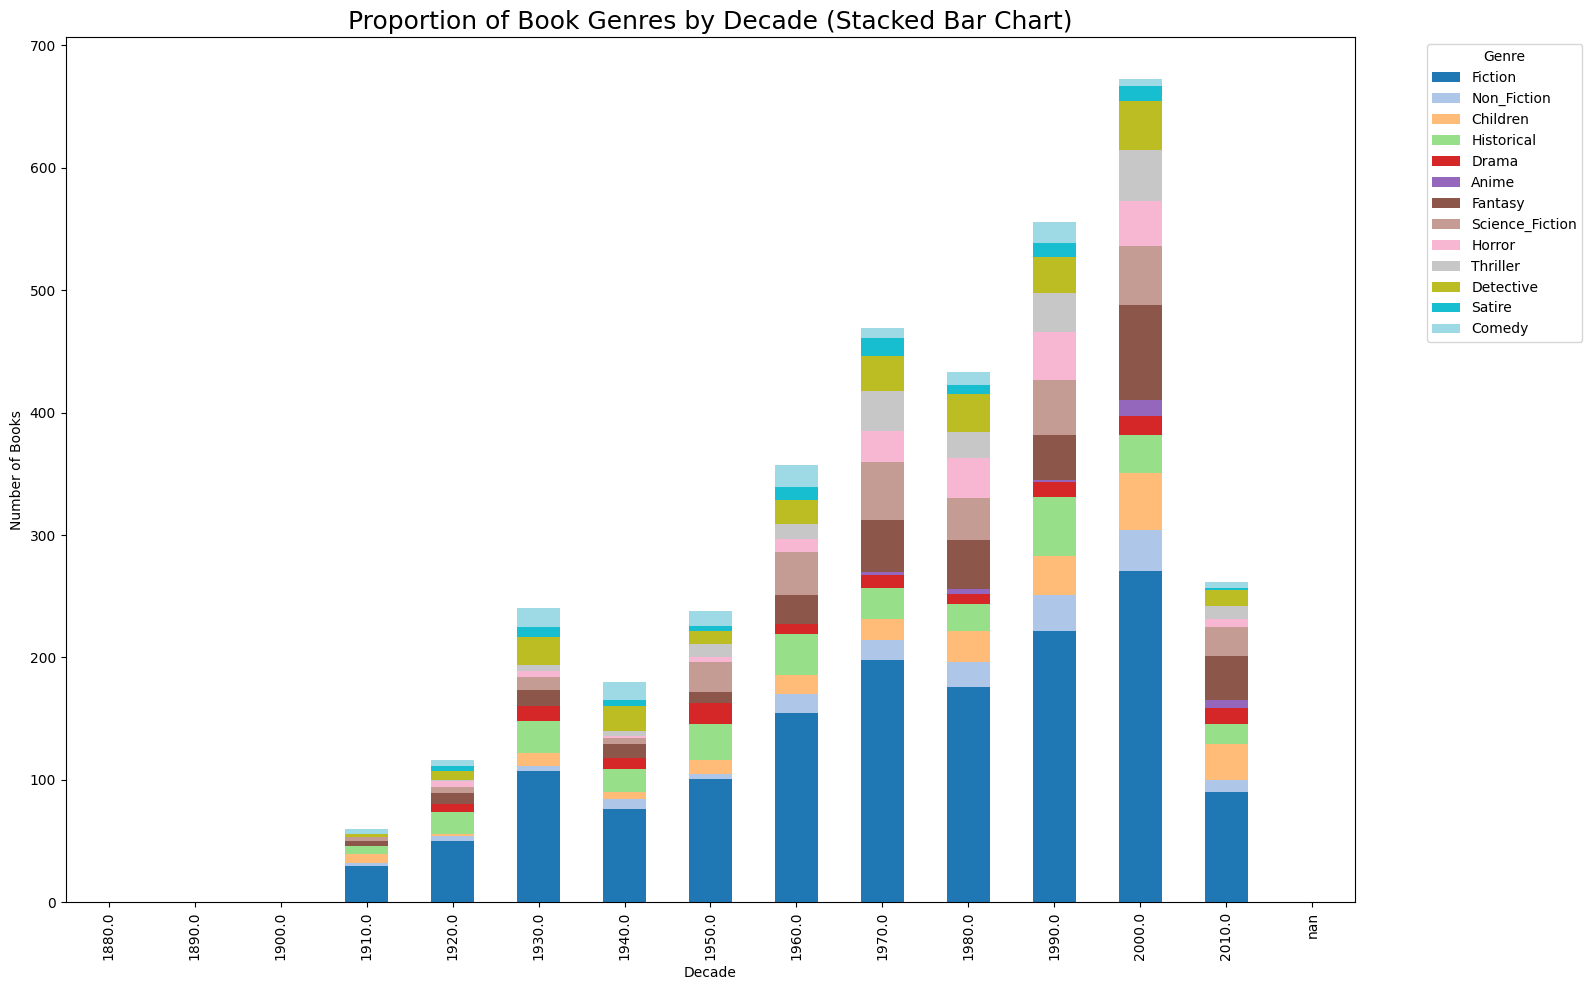

In [42]:
# Group data by decade
df_visualization['decade'] = (df_visualization['movie_release'] // 10) * 10
decade_counts = pd.DataFrame(index=pd.Series(df_visualization['decade'].unique()).sort_values())

# Count the number of books for each genre by decade
for genre in book_genre_columns:
    genre_name = genre.replace('book_', '').title()
    decade_counts[genre_name] = df_visualization[df_visualization[genre] == True].groupby('decade').size()

# Fill NaNs with 0 and plot the stacked bar chart
decade_counts.fillna(0, inplace=True)
decade_counts.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='tab20')
plt.title('Proportion of Book Genres by Decade (Stacked Bar Chart)', fontsize=18)
plt.xlabel('Decade')
plt.ylabel('Number of Books')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The chart illustrates the proportions of different genres among books that were deemed worthy of film adaptations over the years. 
Fiction consistently represents a significant portion of book adaptations across all decades. This suggests that stories within this broad category have been a reliable source for adaptations, likely due to their diverse storytelling potential that appeals to a wide range of audiences.

In more recent decades (e.g., 1980s onward), there is noticeable growth in the diversity of genres being adapted. Fantasy, Science Fiction, and Children's literature show an increase in their share, particularly in the 1990s and 2000s.The increase in Fantasy and Science Fiction adaptations might reflect the film industry's response to the growing audience interest in these genres, bolstered by major adaptations like The Lord of the Rings and Harry Potter series.

Genres like Historical, Drama, and Thriller maintain a steady but smaller share throughout the decades. This steady presence suggests that while they may not dominate the landscape, they are consistently chosen for adaptation due to their compelling narratives and the potential for critical acclaim.

The overall number of adaptations increases as time progresses, with a significant jump in the 1990s and 2000s. This increase could be due to a combination of factors, including the expansion of the global film industry, better adaptation techniques, and a growing appetite for diverse storytelling.

### Top Genres by countries

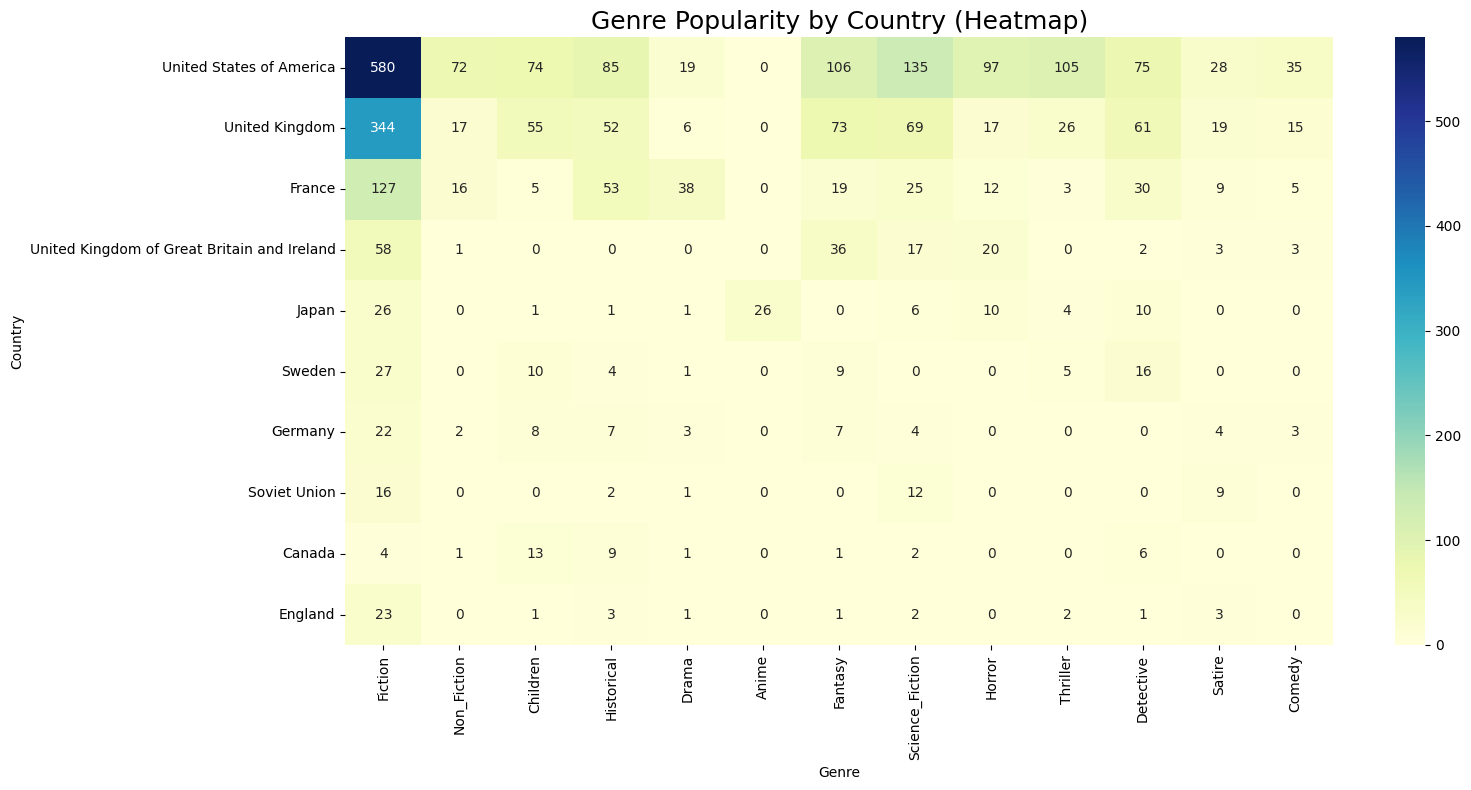

In [43]:
# Genre counts by country
genre_counts_country = pd.DataFrame()

for genre in book_genre_columns:
    genre_name = genre.replace('book_', '').title()
    genre_counts_country[genre_name] = df_visualization[df_visualization[genre] == True].groupby('book_country').size()

# Filter top countries by total adaptations
genre_counts_country.fillna(0, inplace=True)
top_countries_heatmap = genre_counts_country.sum(axis=1).sort_values(ascending=False).head(10).index
genre_counts_country_filtered = genre_counts_country.loc[top_countries_heatmap]

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(genre_counts_country_filtered, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Genre Popularity by Country (Heatmap)', fontsize=18)
plt.xlabel('Genre')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


The heatmap illustrates clear differences in how various countries approach book-to-movie adaptations, with the United States leading in volume and diversity. The United Kingdom and France show strong preferences for Drama and Historical genres (putting aside the fictional books), reflecting their cultural and cinematic traditions. Countries like Japan stand out for unique contributions, such as Anime, while other nations show varied yet smaller-scale adaptation preferences.


### What genres are more often parts of series ? 

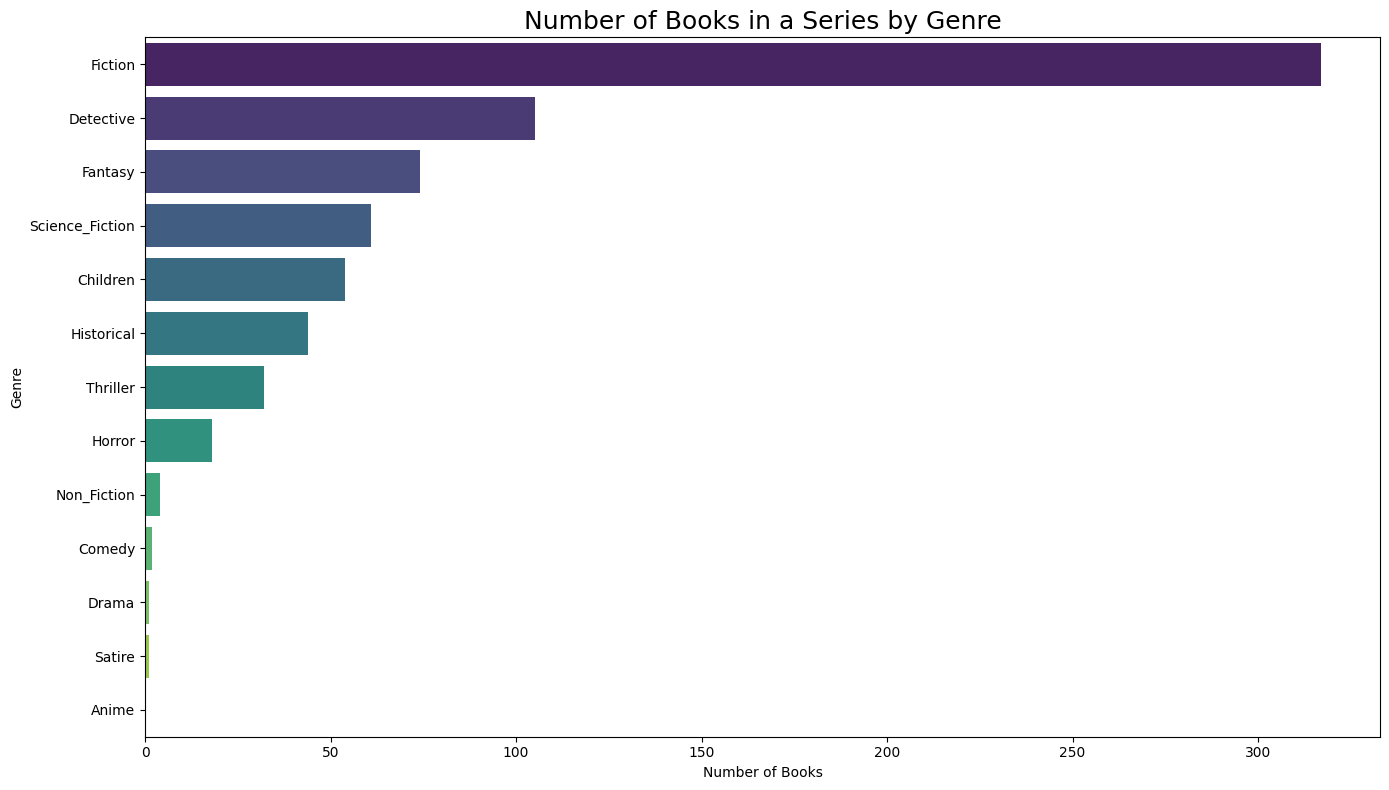

In [44]:
# Filter data for books that are part of a series
series_data = df_visualization[df_visualization['book_part_of_series'] == True]

# Create a DataFrame to count the number of books in series for each genre
series_counts = {}
for genre in book_genre_columns:
    genre_name = genre.replace('book_', '').title()
    series_counts[genre_name] = series_data[series_data[genre] == True].shape[0]

# Convert to a Pandas Series for easy plotting
series_counts = pd.Series(series_counts).sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=series_counts.values, y=series_counts.index, palette='viridis',legend=False,hue=series_counts.index)
plt.title('Number of Books in a Series by Genre', fontsize=18)
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

This bar chart highlights that Fiction dominates as the genre most commonly adapted from book series, pointing to its versatility and the audience's appetite for continuous storytelling. Detective and Fantasy genres also show strong representation in series, likely due to their potential for developing intricate plots and recurring characters that keep viewers engaged.The low numbers for Non-Fiction, Comedy, Drama, and Satire suggest that these genres often don't lend themselves to series-based storytelling, perhaps due to their focus on standalone narratives or themes that don't easily extend across multiple books.

### Number of people that rate books per country

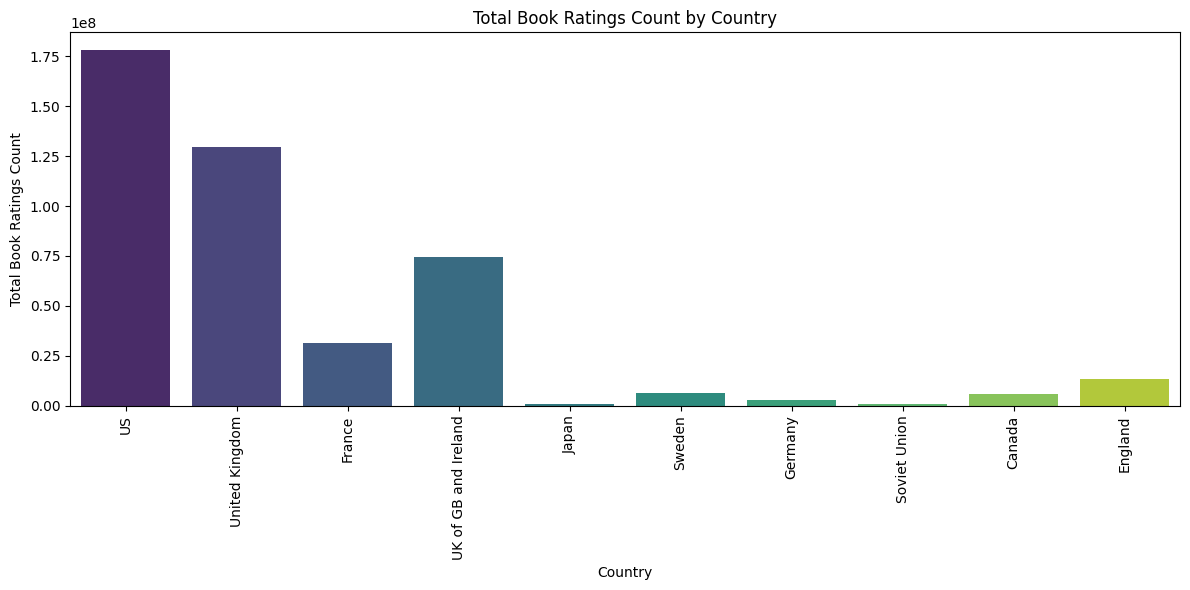

In [45]:
# Create a DataFrame for total book ratings count by country
ratings_count_country = df_visualization.groupby('book_country')['book_ratings_count'].sum().sort_values(ascending=False)

# Filter the top countries by ratings count
top_countries_ratings = ratings_count_country.loc[top_countries_heatmap]  # Using previously defined `top_countries_heatmap`

# Create a dictionary to map long country names to shorter versions
country_name_map = {
    'United States of America': 'US',
    'United Kingdom of Great Britain and Ireland': 'UK of GB and Ireland',
}

# Replace country names in the dataframe
top_countries_ratings.index = top_countries_ratings.index.to_series().replace(country_name_map) 

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_ratings.index, y=top_countries_ratings.values, palette='viridis', legend=False, hue =top_countries_ratings.index )
plt.title('Total Book Ratings Count by Country')
plt.xlabel('Country')
plt.ylabel('Total Book Ratings Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Dominance of the US and the UK:

The United States (US) and the United Kingdom (UK) have a significantly higher total number of book ratings compared to other countries. This is consistent with the larger number of adaptations originating from these regions in the dataset.

- Lower Counts for Other Countries:

Countries like France, Germany, and Japan have much lower total book ratings counts, which aligns with fewer adaptations and literary representation in the dataset.

### Relation between book_pages and genres

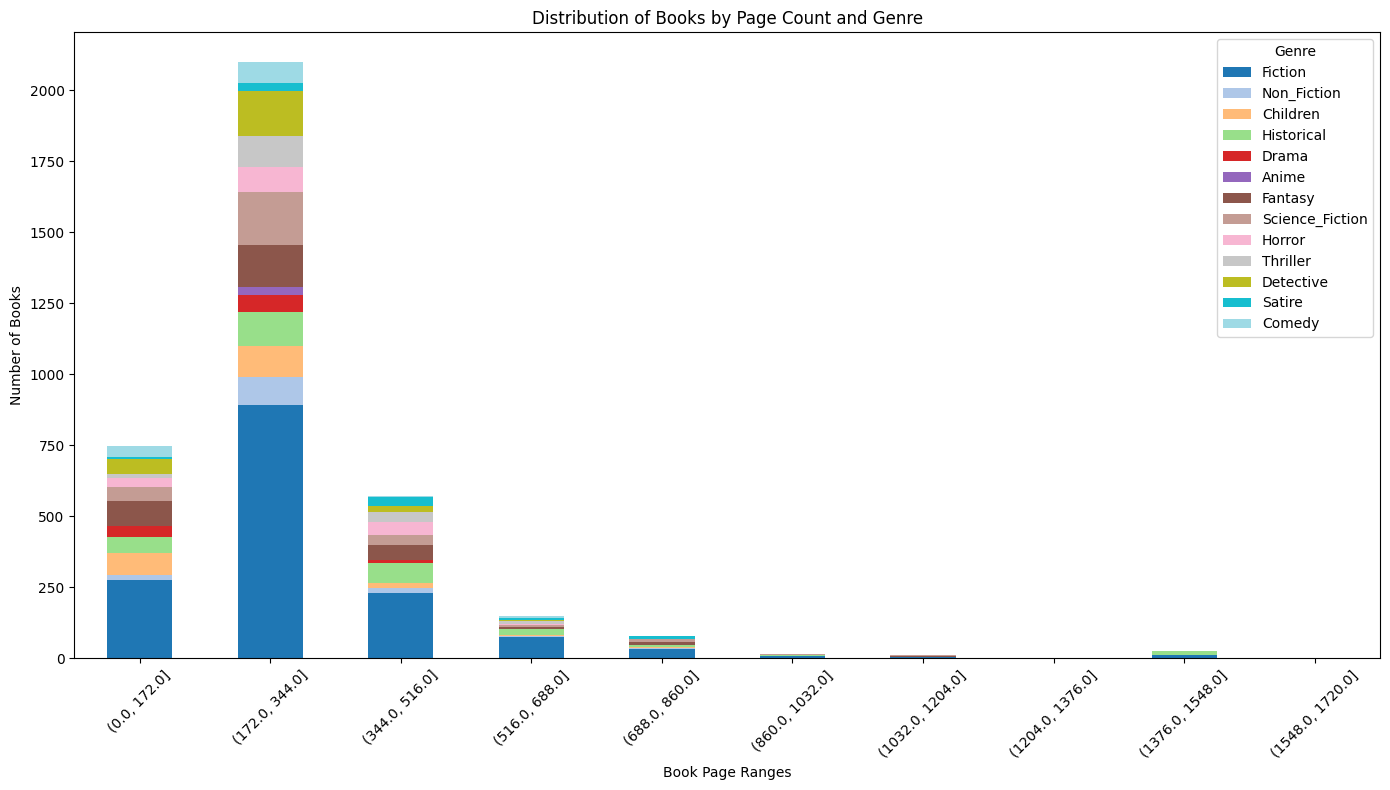

In [46]:
# Define custom bins starting at 0 and ending at the maximum of 'book_pages' with 10 equal intervals
bin_edges = np.linspace(0, df_visualization['book_pages'].max(), 11)
bins = pd.cut(df_visualization['book_pages'], bins=bin_edges)

# Create a DataFrame to count the number of books in each genre for each bin
genre_counts_by_bins = pd.DataFrame()

for genre in book_genre_columns:
    genre_name = genre.replace('book_', '').title()
    # Count the number of books in each bin for the genre
    genre_counts_by_bins[genre_name] = df_visualization[df_visualization[genre] == True].groupby(bins, observed=False).size()

# Plotting the stacked bar chart
ax = genre_counts_by_bins.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Distribution of Books by Page Count and Genre')
plt.xlabel('Book Page Ranges')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

The majority of books, regardless of genre, fall within the lower page count ranges (up to around 516 pages). Beyond this, the number of books in each genre decreases significantly. This trend implies that most books considered for adaptations or present in the dataset have relatively shorter lengths.

In the higher page count ranges (over 688 pages), there is a steep drop in the number of books, with very few genres appearing at these lengths. This could indicate that long books are less commonly adapted or are less prevalent in the dataset.

Since missing values for 'book_pages' were filled using the median, this could contribute to the concentration of books in certain page count ranges. The distribution might be slightly biased towards the median range, which could mask the true distribution of very short or very long books.

## Movie features visualization

### Top genres

In [47]:
# Flatten the genre lists and count each genre
all_genres = [genre for sublist in df_visualization['movie_genres'] for genre in sublist]
genre_counts = Counter(all_genres)

all_countries = [country for sublist in df_visualization['movie_countries'] for country in sublist]

# Convert the Counter to a DataFrame for easier viewing
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
country_counts_df = pd.DataFrame(Counter(all_countries).items(), columns=['Country', 'Count']).sort_values(by='Count', ascending=False)

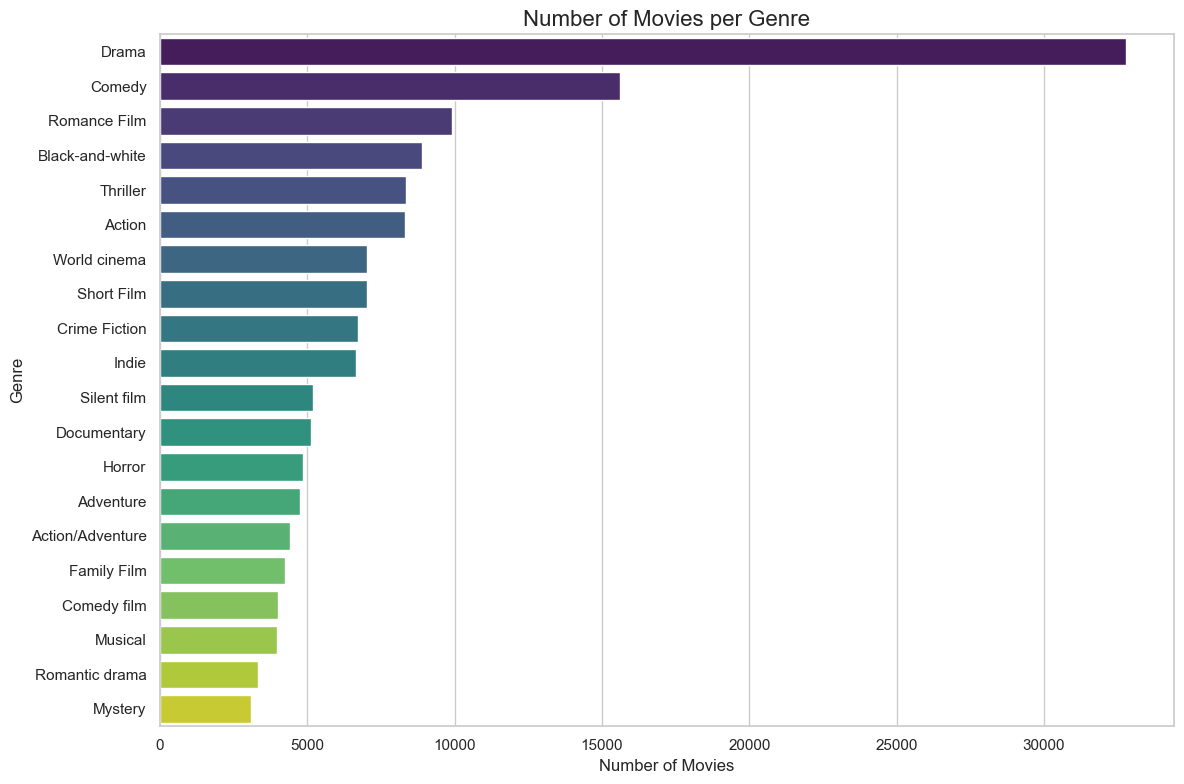

In [48]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(
    x='Count', 
    y='Genre', 
    data=genre_counts_df.head(20), 
    palette="viridis",
    legend=False, 
    hue = 'Genre'
)

# Add labels and title
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Number of Movies per Genre", fontsize=16)
plt.tight_layout()

plt.show()


This bar chart shows the number of movies for the top 20 most popular genres. Drama and Comedy stand out with the highest counts, indicating their widespread appeal and prominence in the film industry. Romance Film, Black-and-white, and Thriller also have significant numbers, suggesting a strong historical and ongoing interest in these genres.

Genres like World cinema, Short Film, and Documentary have moderate representation, reflecting niche but dedicated markets. Meanwhile, genres such as Romantic drama, Musical, and Mystery have lower counts in comparison, indicating more specialized audiences. This distribution highlights both dominant and niche genres within the global movie landscape, with Drama clearly leading as the most produced genre.

### Top movie genres per country

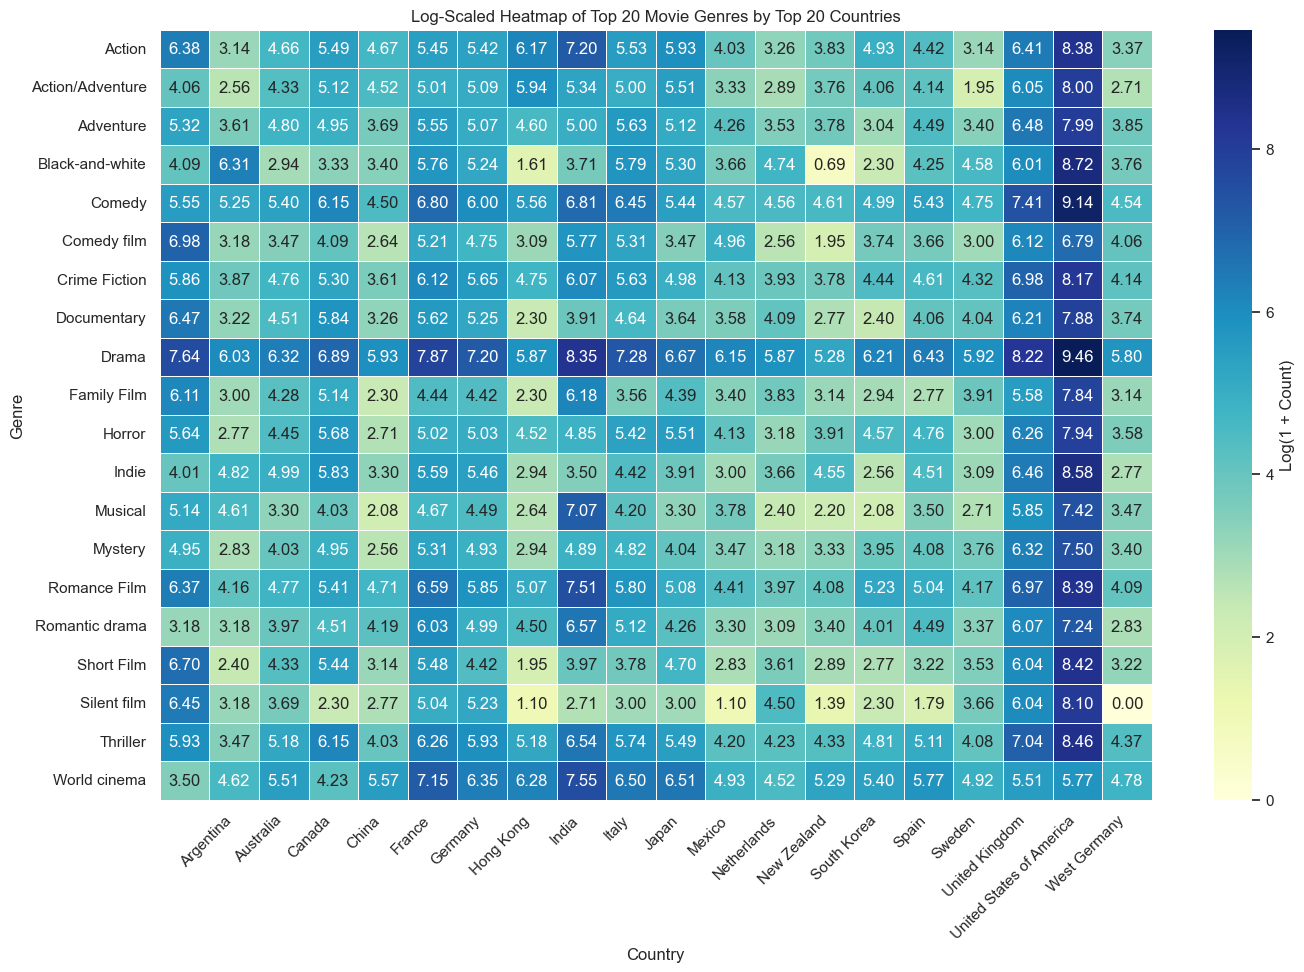

In [49]:
# Explode 'movie_genres' and 'movie_countries' to have one genre-country per row
df_exploded = df_visualization.explode('movie_genres').explode('movie_countries')

# Find the top 10 most frequent genres
top_genres = df_exploded['movie_genres'].value_counts().head(20).index

# Find the top 10 most frequent countries
top_countries = df_exploded['movie_countries'].value_counts().head(20).index

# Filter the DataFrame to include only the top genres and countries
df_top = df_exploded[df_exploded['movie_genres'].isin(top_genres) & df_exploded['movie_countries'].isin(top_countries)]

# Group by genre and country, then count occurrences
genre_country_counts = df_top.groupby(['movie_genres', 'movie_countries']).size().reset_index(name='Count')

# Pivot the table to prepare for heatmap
heatmap_data = genre_country_counts.pivot(index='movie_genres', columns='movie_countries', values='Count').fillna(0)

# Apply log scale to the heatmap data
log_heatmap_data = np.log1p(heatmap_data)

# Plot the log-scaled heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(log_heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5, 
            cbar_kws={'label': 'Log(1 + Count)'})
plt.title("Log-Scaled Heatmap of Top 20 Movie Genres by Top 20 Countries")
plt.xlabel("Country")
plt.ylabel("Genre")
plt.xticks(rotation=45, ha='right')
plt.show()


This heatmap shows the popularity of the top 20 movie genres across the top 20 countries, with darker colors representing higher frequencies. Using a log scale allows for easy comparison across varied counts.

Global trends: "Drama" and "Comedy" are popular worldwide, with especially high diversity in the U.S. and U.K., reflecting broad genre appeal. Regional highlights: France and Germany show a strong presence in "World cinema" and "Silent film," likely due to historical and art-house influences. In China, "Action" and "Adventure" are prominent, aligning with local demand for visually dynamic films. India shows strong counts in "Drama," "Romance Film," and "Action," typical of Bollywood's storytelling style. This heatmap captures both universal appeal and unique regional preferences, illustrating the diversity of the film industry globally.

### Which countries are the biggest producers ?

/var/folders/tf/wy7jpq61155d6ns51pvqlf240000gn/T/ipykernel_2140/1673468467.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


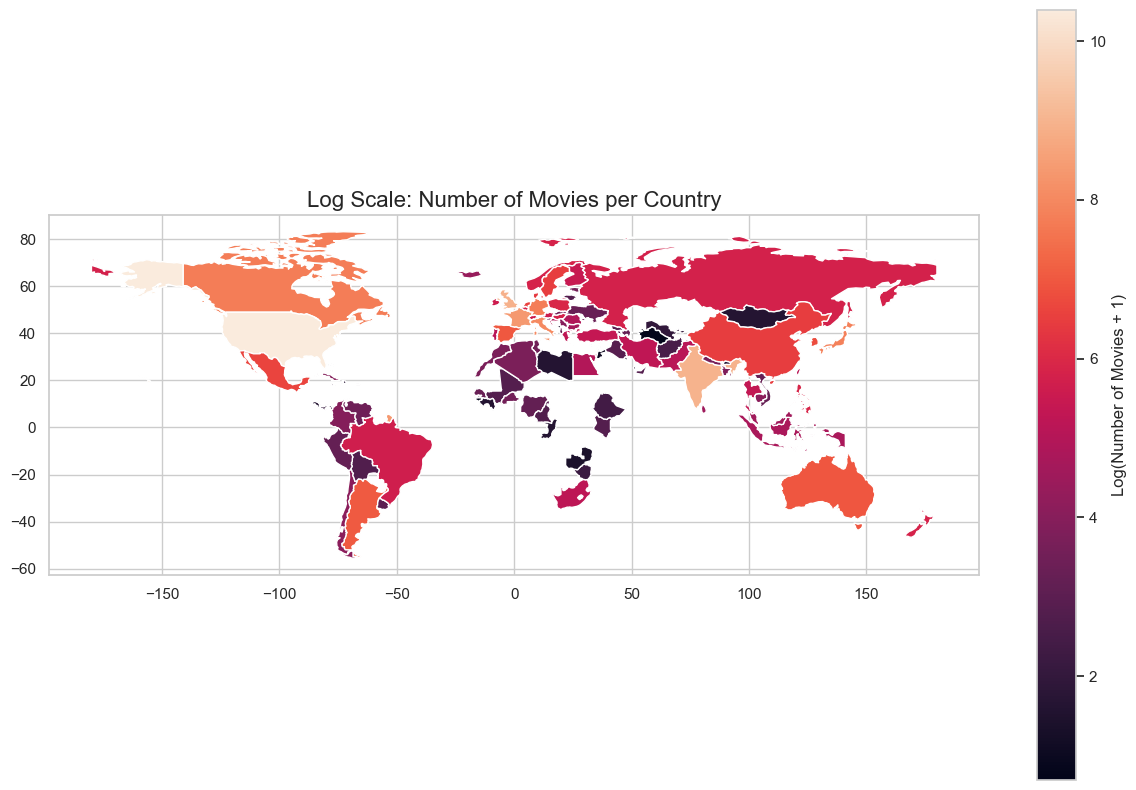

In [50]:
#Using geopandas to plot using a world map
#Install geopandas using 'conda install geopandas' not 'pip install geopandas'

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a DataFrame with the country counts
country_counts_df = pd.DataFrame(Counter(all_countries).items(), columns=['Country', 'Count'])

# Merge the country counts with the world GeoDataFrame
world = world.merge(country_counts_df, how='left', left_on='name', right_on='Country')

# convert the count to log scale
world['Log_Count'] = log1p(world['Count'])

# Create a GeoDataFrame with the movie counts
gdf = gpd.GeoDataFrame(world, geometry='geometry')

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='Log_Count', ax=ax, legend=True, legend_kwds={'label': "Log(Number of Movies + 1)"})
plt.title("Log Scale: Number of Movies per Country", fontsize=16)

plt.show()


This map shows the number of movies produced per country, with a log scale applied to highlight differences more clearly. Darker shades indicate higher movie counts, while lighter shades represent fewer movies.

The United States and India stand out with the brightest colors, reflecting their large and prolific film industries (Hollywood and Bollywood). Other regions with notable film output include Russia, Japan, and China, visible in darker shades. European countries, such as France, Italy, and Germany, also show significant production, aligning with their historical and cultural influence on cinema. In contrast, regions with fewer productions, like parts of Africa and Southeast Asia, appear in dark shades, indicating less film output.

This map effectively illustrates global movie production patterns, with a clear contrast between major film-producing nations and countries with smaller film industries. The log scale helps reveal differences across a wide range of production levels.

### Genres popularity per decades

<Figure size 1500x800 with 0 Axes>

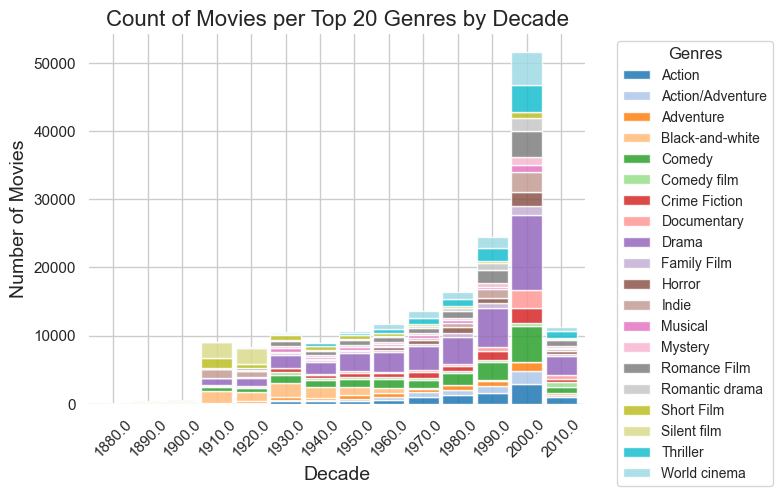

In [51]:
# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Grouping release years into 20-year intervals
df_exploded['decade'] = (df_exploded['movie_release'] // 10) * 10

# Getting the top 20 genres by frequency
top_genres = df_exploded['movie_genres'].value_counts().head(20).index

# Filter to include only the top 20 genres
df_top_genres = df_exploded[df_exploded['movie_genres'].isin(top_genres)]

# Grouping by decade and genre to count occurrences, but only for top genres
genre_decade_counts_top = df_top_genres.groupby(['decade', 'movie_genres']).size().unstack(fill_value=0)

# Plotting with Seaborn style and more color variety
plt.figure(figsize=(15, 8))
ax = genre_decade_counts_top.plot(kind='bar', stacked=True, color=sns.color_palette("tab20", n_colors=20), alpha=0.85, width=0.9)

# Customize plot aesthetics
plt.title("Count of Movies per Top 20 Genres by Decade", fontsize=16)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
sns.despine(left=True, bottom=True)  # Removes top and right spines for a cleaner look

plt.show()

This chart illustrates the production of movies in the top 20 genres across each decade, with each bar representing a decade’s total movie count and each color segment indicating a genre's contribution.

Movie production has grown significantly, especially from the 1960s onward, peaking in the 2000s. This increase reflects both technological advancements and rising global demand. Drama and Comedy are consistently dominant across decades, highlighting their universal appeal in storytelling.

In recent decades, we see more diversity in genres:

Horror and Thriller emerge strongly from the 1970s, appealing to audiences’ growing interest in suspense and darker themes.
World Cinema and Indie genres expand, reflecting a shift toward independent, culturally specific storytelling, likely driven by increased global connectivity.
Action/Adventure and Family Films also grow, aligning with the rise of global blockbusters and family-friendly entertainment.
This chart reveals both the expansion of the film industry and the evolution of genre preferences, showing how filmmakers have adapted to shifting audience tastes and broader, more globalized distribution opportunities.



### What genres co-ocurr the most (in same movie) ?

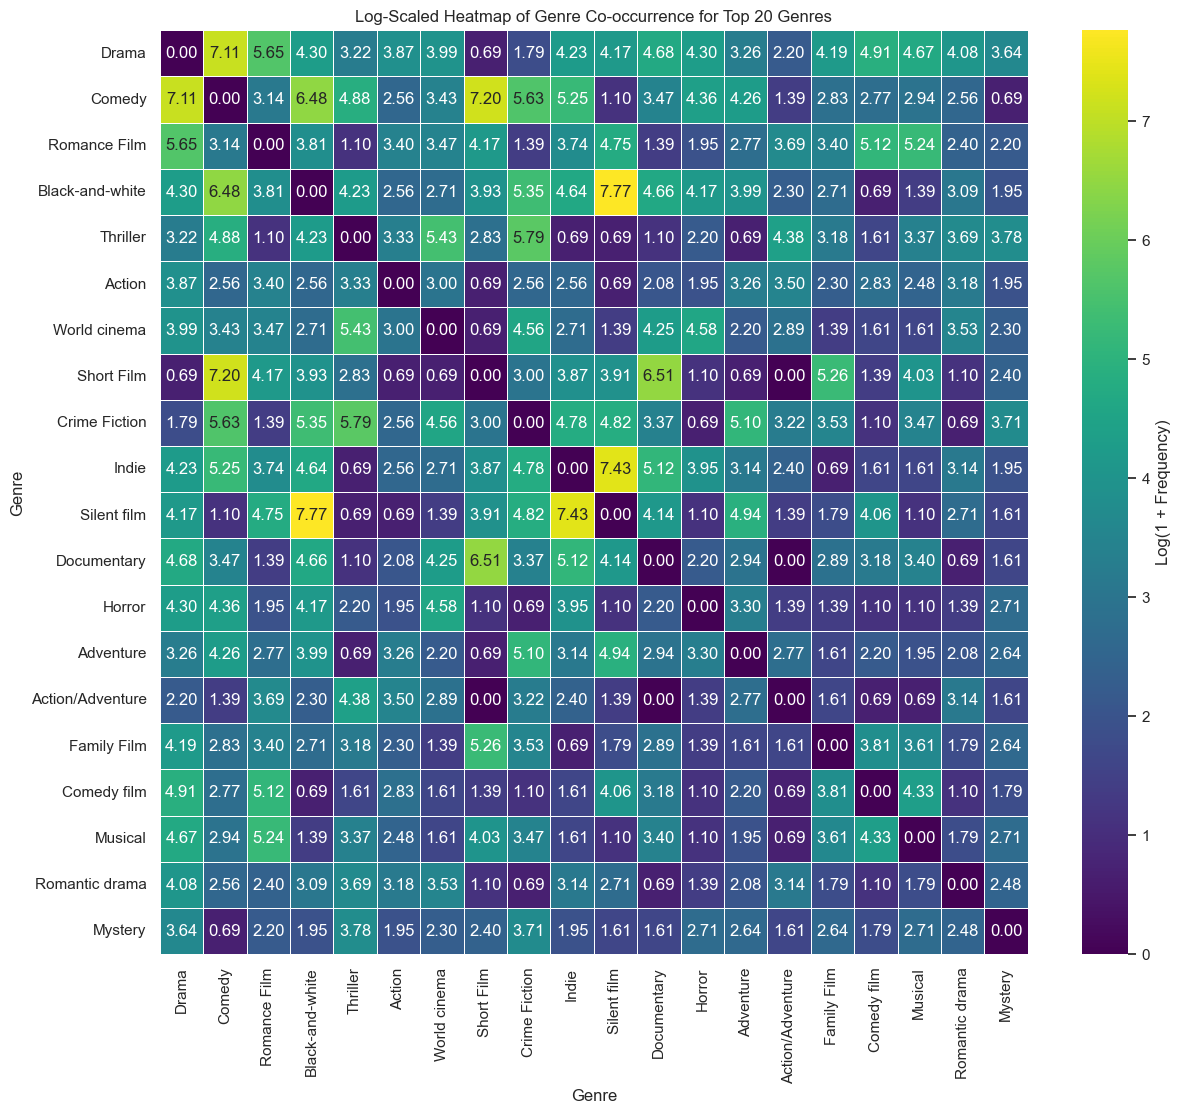

In [52]:
import itertools as itertools

# Assuming pair_counts_30 and intermediary_dataset are already defined
# Explode 'movie_genres' to create individual genre entries for each movie
df_exploded_genres = df_visualization.explode('movie_genres')

# Getting the top 30 genres by frequency
top_30_genres = df_exploded_genres['movie_genres'].value_counts().head(20).index

df_top_30_genres = df_visualization[
    df_visualization['movie_genres'].apply(lambda genres: all(genre in top_30_genres for genre in genres))
]

# Create pairs of genres that co-occur in the same movie for only the top 30 genres
genre_combinations_30 = df_top_30_genres['movie_genres']
genre_pairs_30 = [list(itertools.combinations(genres, 2)) for genres in genre_combinations_30 if len(genres) > 1]
genre_pairs_flat_30 = [pair for pairs in genre_pairs_30 for pair in pairs]

# Count the frequency of each genre pair
pair_counts_30 = pd.Series(genre_pairs_flat_30).value_counts()

# Create a co-occurrence matrix for the top 30 genres
co_occurrence_matrix = pd.DataFrame(0, index=top_30_genres, columns=top_30_genres)

# Populate the co-occurrence matrix with the frequency of genre pairs
for (genre1, genre2), count in pair_counts_30.items():
    if genre1 in top_30_genres and genre2 in top_30_genres:
        co_occurrence_matrix.loc[genre1, genre2] = count
        co_occurrence_matrix.loc[genre2, genre1] = count  # Ensure symmetry

# Apply log scale to the co-occurrence matrix
log_co_occurrence_matrix = np.log1p(co_occurrence_matrix)

# Plot a heatmap of the log-scaled co-occurrence matrix
plt.figure(figsize=(14, 12))
sns.heatmap(log_co_occurrence_matrix, cmap="viridis", annot=True, fmt='.2f', linewidths=.5,
            cbar_kws={'label': 'Log(1 + Frequency)'})
plt.title("Log-Scaled Heatmap of Genre Co-occurrence for Top 20 Genres")
plt.xlabel("Genre")
plt.ylabel("Genre")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

This heatmap reveals patterns in the co-occurrence of the top 20 movie genres, using a log scale to capture a wide range of frequencies. Darker cells indicate stronger genre pairings.

**Versatile Genres**

- **Drama** frequently co-occurs with **Romance Film**, **Crime Fiction**, and **Documentary**, showing its adaptability across diverse themes, from emotional to gritty narratives.
- **Comedy** often pairs with **Romance Film** and **Family Film**, highlighting its role in lighthearted, family-friendly, and romantic stories.

**Action-Adventure Cluster**

- **Action**, **Adventure**, and **Thriller** genres frequently appear together, appealing to audiences who enjoy suspense and excitement.
- These genres also connect with **Crime Fiction** and **Horror**, reflecting their use in creating tense, thrilling narratives.

**Historical Pairings**

- **Silent film** and **Black-and-white** show high co-occurrence, likely due to historical connections rather than thematic similarities.
- **World cinema** and **Indie** often appear together, pointing to a shared focus on artistic or culturally specific stories outside the mainstream.

**Niche and Artistic Clusters**

- **Short Film**, **Documentary**, and **Indie** genres frequently co-occur, attracting niche audiences interested in experimental or informational films.
- **Family Film** aligns with **Musical** and **Comedy**, highlighting genres that appeal to a wide age range and offer universally accessible themes.

**Modern Trends**

- **Horror** pairs with **Thriller** and **Crime Fiction**, reflecting a trend toward suspenseful horror films with crime elements.
- **Romantic Drama** often co-occurs with **Drama** and **Romance Film**, indicating a consistent appeal for emotionally charged, character-driven narratives.

### Conclusion

This heatmap captures how genres blend to create diverse cinematic experiences, from versatile genres like **Drama** and **Comedy** to historical pairs like **Silent film** and **Black-and-white**, and niche combinations like **World cinema** and **Indie**. The data reflects the flexibility of certain genres and emerging trends in genre pairings that align with evolving audience preferences.